# Deep Convolutional VAE with face emotion data

In [1]:
import os
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
import matplotlib.pyplot as plt
from util import gpusession,plot_grid_imgs
from model import basic_vae
from custom_ops import lrelu
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print ("Packages Loaded")

Packages Loaded


Load Data

In [2]:
loadpath = '../data/face_emotion.npz'
l = np.load(loadpath)
trainimg,trainlabel = l['trainimg'],l['trainlabel']
testimg,testlabel = l['testimg'],l['testlabel']
valimg,vallabel = l['valimg'],l['vallabel']
ntrain,ntest,nval = trainimg.shape[0],testimg.shape[0],valimg.shape[0]
X,Y,imgcnt,labels,xshp=l['X'],l['Y'],l['imgcnt'],l['labels'],l['rszshape']
xdim,nclass = X.shape[1],Y.shape[1]
print ("[%d] images with xshape:[%s] and nclass:[%d]"%(X.shape[0],xshp,nclass))
print ("#Train:[%d] #Test[%d] #Validation[%d]"%(ntrain,ntest,nval))

[35886] images with xshape:[[64 64]] and nclass:[7]
#Train:[25120] #Test[7177] #Validation[3589]


Instantiate DCVAE

In [3]:
V = basic_vae(_name='VAE',_xdim=np.prod(xshp),_zdim=256,_hdim=512,_actv=lrelu,
                _lr=0.0005,_beta1=0.5,_beta2=0.99,_epsilon=1e-6)

[VAE] Instantiated
 xdim:[4096] zdim:[256] hdim:[512]
Trainable Variables
 [0] Name:[encoder/lin0/weights:0] Shape:[[4096, 512]]
 [1] Name:[encoder/lin0/BatchNorm/beta:0] Shape:[[512]]
 [2] Name:[encoder/lin1/weights:0] Shape:[[512, 512]]
 [3] Name:[encoder/lin1/BatchNorm/beta:0] Shape:[[512]]
 [4] Name:[encoder/zmu/weights:0] Shape:[[512, 256]]
 [5] Name:[encoder/zmu/BatchNorm/beta:0] Shape:[[256]]
 [6] Name:[encoder/zlogvar/weights:0] Shape:[[512, 256]]
 [7] Name:[encoder/zlogvar/BatchNorm/beta:0] Shape:[[256]]
 [8] Name:[decoder/lin0/weights:0] Shape:[[256, 512]]
 [9] Name:[decoder/lin0/BatchNorm/beta:0] Shape:[[512]]
 [10] Name:[decoder/lin1/weights:0] Shape:[[512, 512]]
 [11] Name:[decoder/lin1/BatchNorm/beta:0] Shape:[[512]]
 [12] Name:[decoder/lin2/weights:0] Shape:[[512, 4096]]
 [13] Name:[decoder/lin2/BatchNorm/beta:0] Shape:[[4096]]
Global Variables
 [0] Name:[encoder/lin0/weights:0] Shape:[[4096, 512]]
 [1] Name:[encoder/lin0/BatchNorm/beta:0] Shape:[[512]]
 [2] Name:[encode

Optimize DCVAE

[0e+00/1e+06 0.0%][kl_weight:1.00] [LOSS] TOTAL[1471.7]=RECON[1259.6]+KL[212.1]


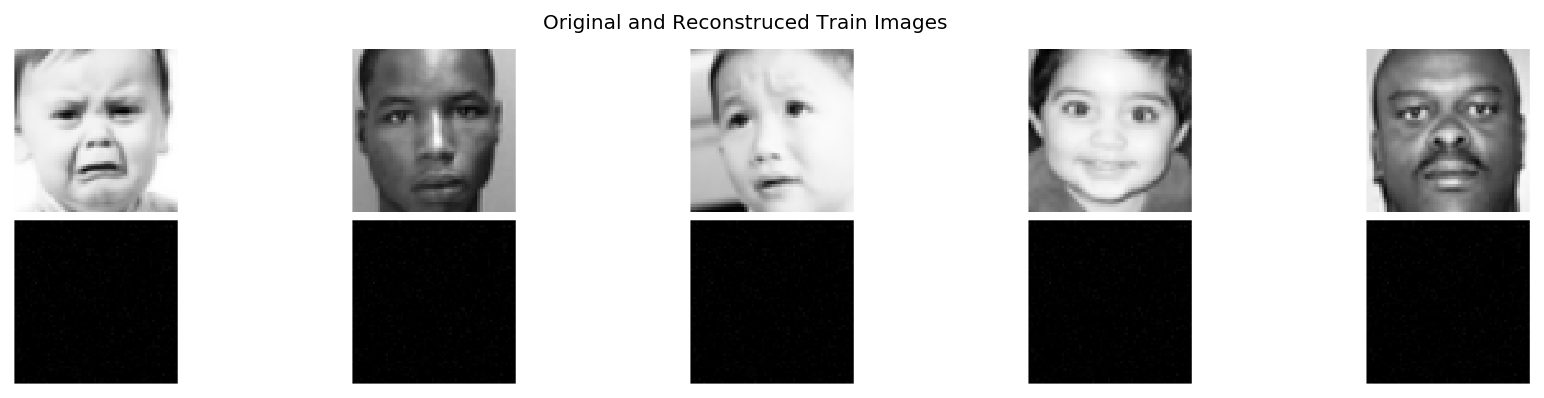

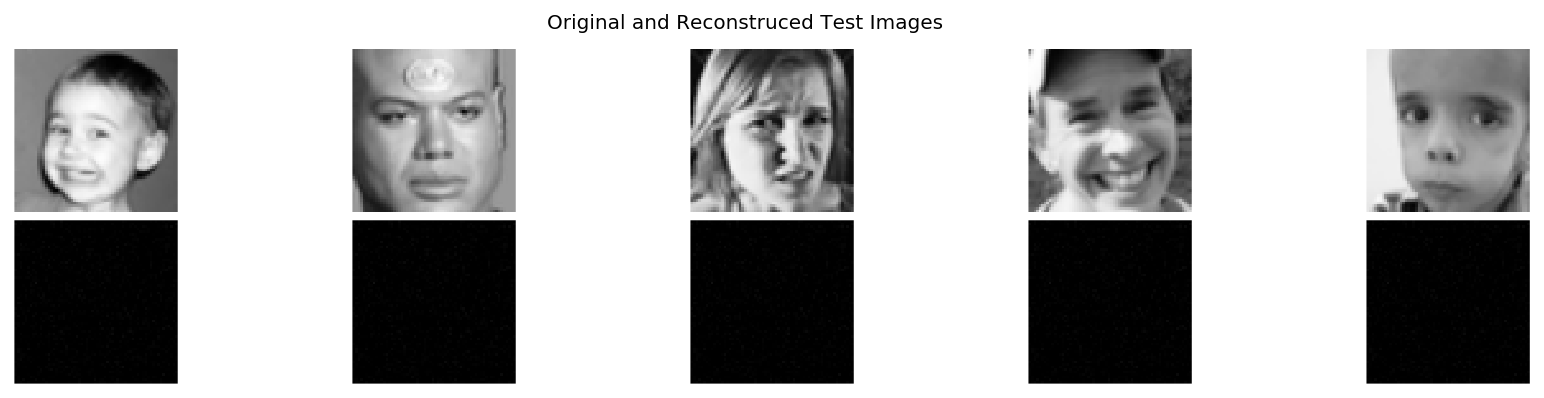

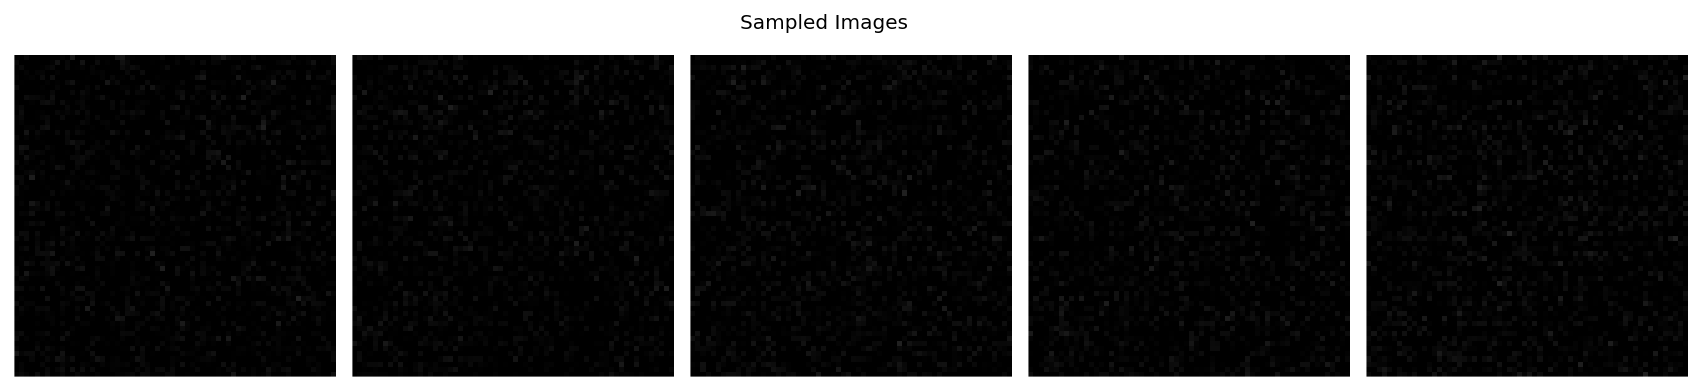

[2e+04/1e+06 2.0%][kl_weight:1.00] [LOSS] TOTAL[390.4]=RECON[247.5]+KL[142.9]
[4e+04/1e+06 4.0%][kl_weight:1.00] [LOSS] TOTAL[362.9]=RECON[222.4]+KL[140.5]
[6e+04/1e+06 6.0%][kl_weight:1.00] [LOSS] TOTAL[353.6]=RECON[213.4]+KL[140.2]
[8e+04/1e+06 8.0%][kl_weight:1.00] [LOSS] TOTAL[349.2]=RECON[210.0]+KL[139.2]
[1e+05/1e+06 10.0%][kl_weight:1.00] [LOSS] TOTAL[344.4]=RECON[205.2]+KL[139.2]


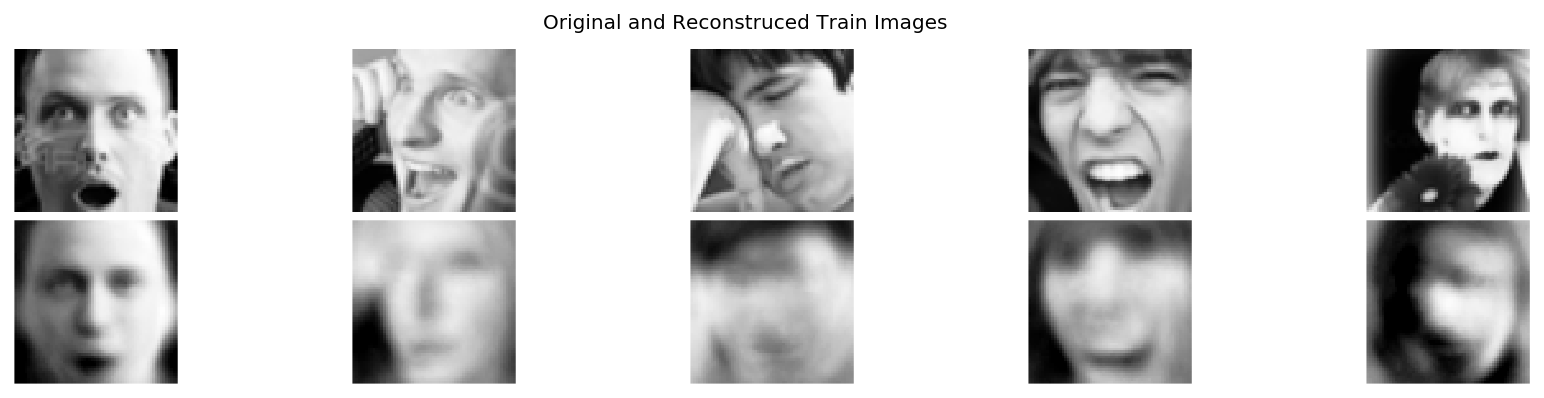

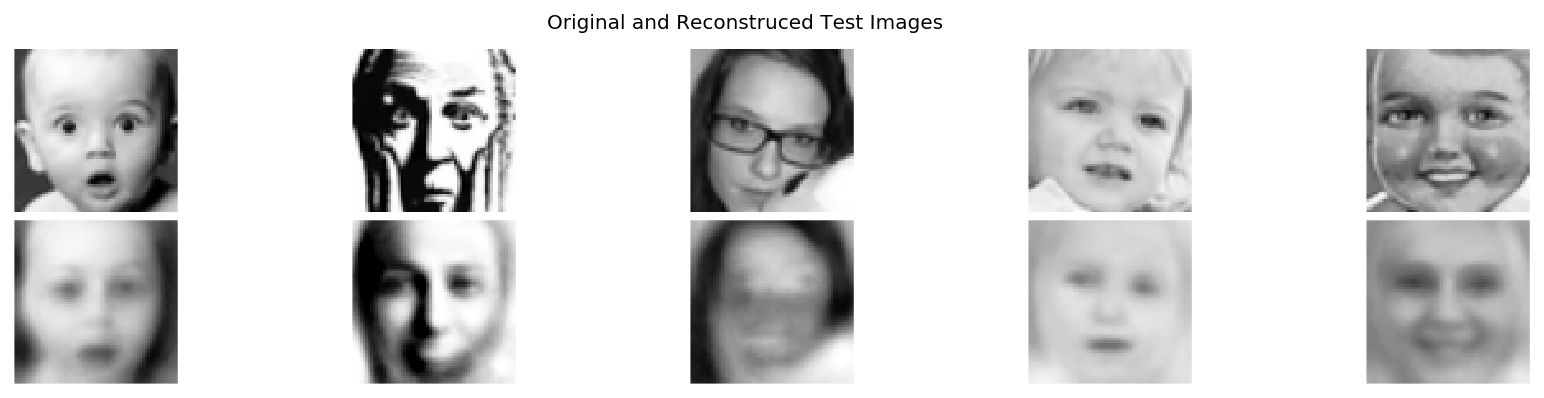

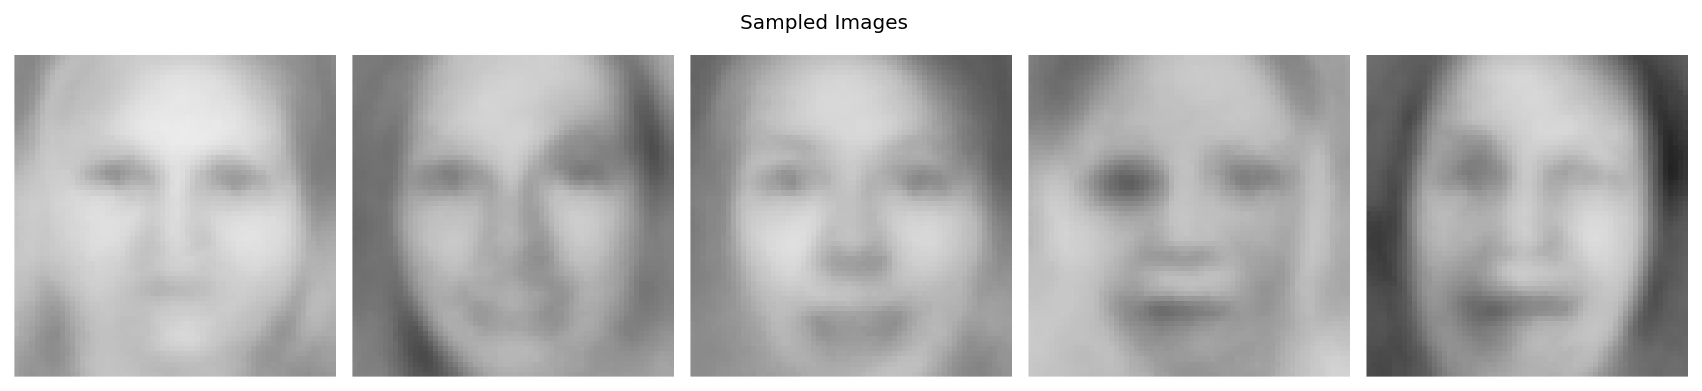

[1e+05/1e+06 12.0%][kl_weight:1.00] [LOSS] TOTAL[346.8]=RECON[207.6]+KL[139.2]
[1e+05/1e+06 14.0%][kl_weight:1.00] [LOSS] TOTAL[346.9]=RECON[207.7]+KL[139.3]
[2e+05/1e+06 16.0%][kl_weight:1.00] [LOSS] TOTAL[341.6]=RECON[202.4]+KL[139.2]
[2e+05/1e+06 18.0%][kl_weight:1.00] [LOSS] TOTAL[341.2]=RECON[202.0]+KL[139.2]
[2e+05/1e+06 20.0%][kl_weight:1.00] [LOSS] TOTAL[341.7]=RECON[202.4]+KL[139.3]


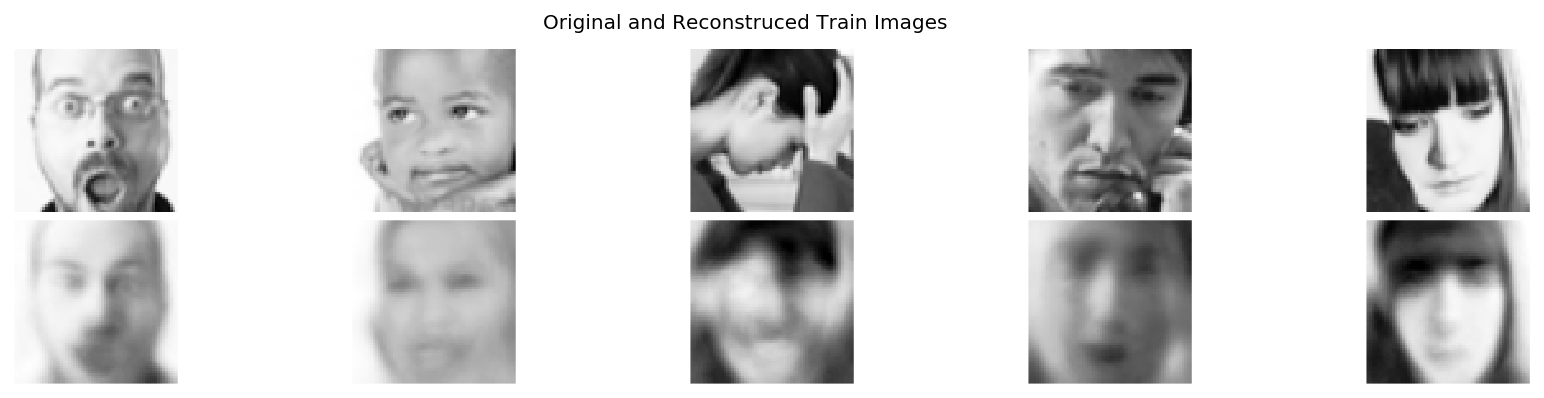

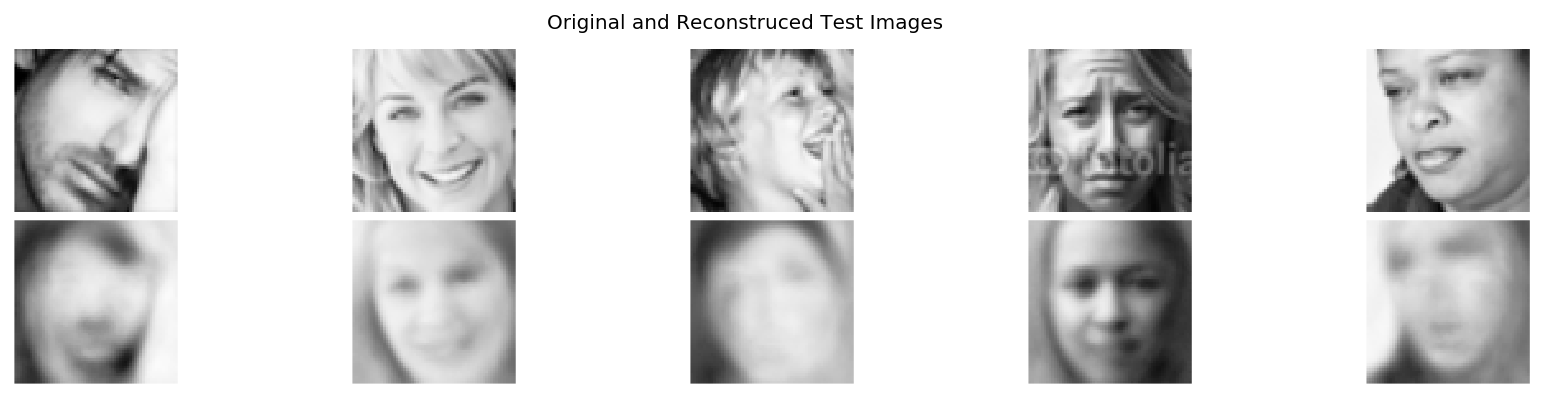

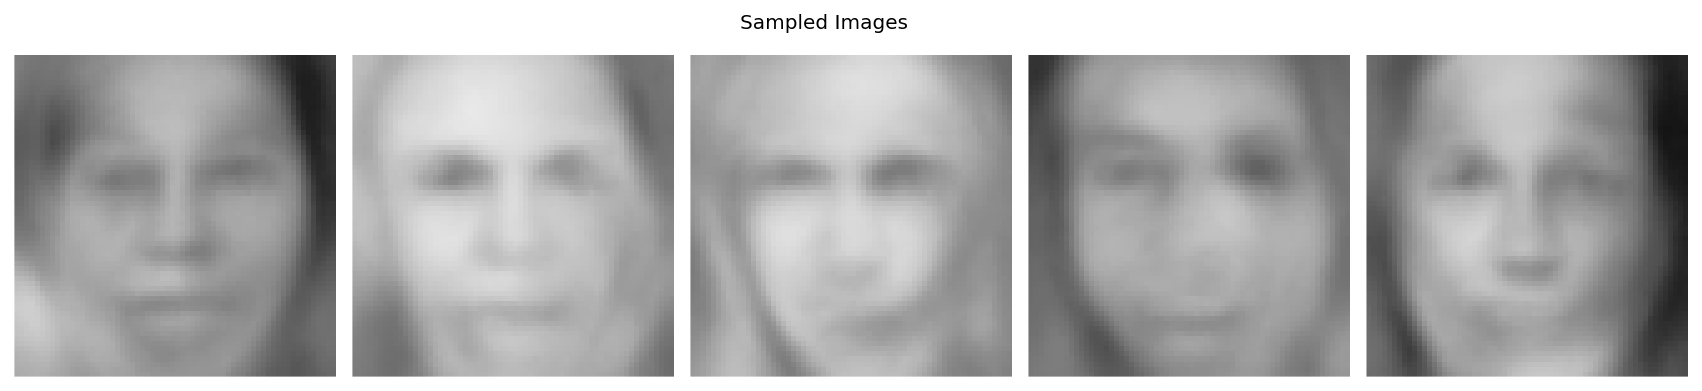

[2e+05/1e+06 22.0%][kl_weight:1.00] [LOSS] TOTAL[341.9]=RECON[202.5]+KL[139.3]
[2e+05/1e+06 24.0%][kl_weight:1.00] [LOSS] TOTAL[335.5]=RECON[196.1]+KL[139.4]
[3e+05/1e+06 26.0%][kl_weight:1.00] [LOSS] TOTAL[334.5]=RECON[195.1]+KL[139.3]
[3e+05/1e+06 28.0%][kl_weight:1.00] [LOSS] TOTAL[334.9]=RECON[195.6]+KL[139.3]
[3e+05/1e+06 30.0%][kl_weight:1.00] [LOSS] TOTAL[333.6]=RECON[194.2]+KL[139.4]


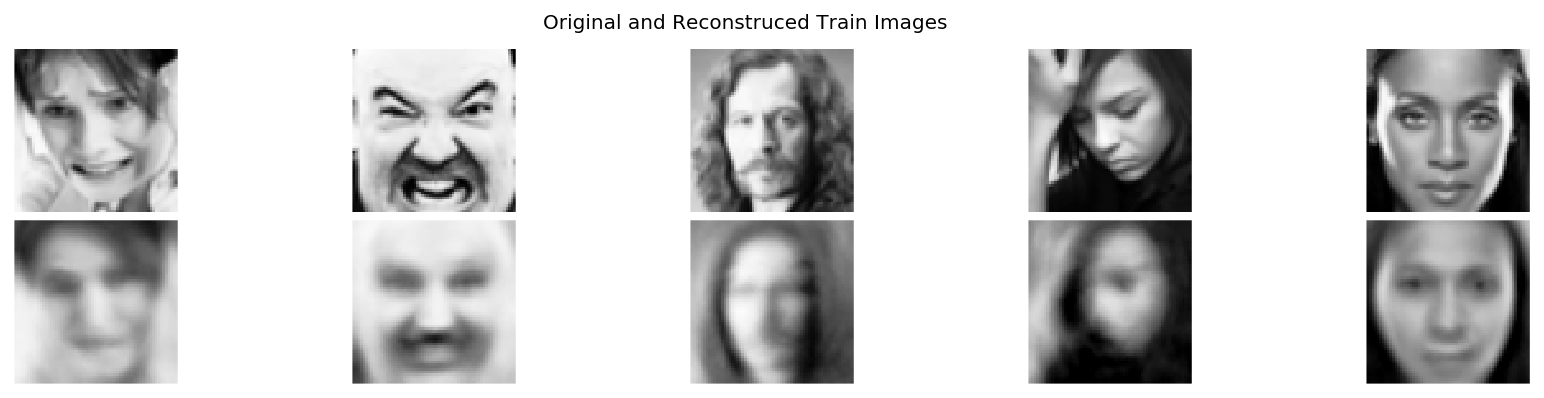

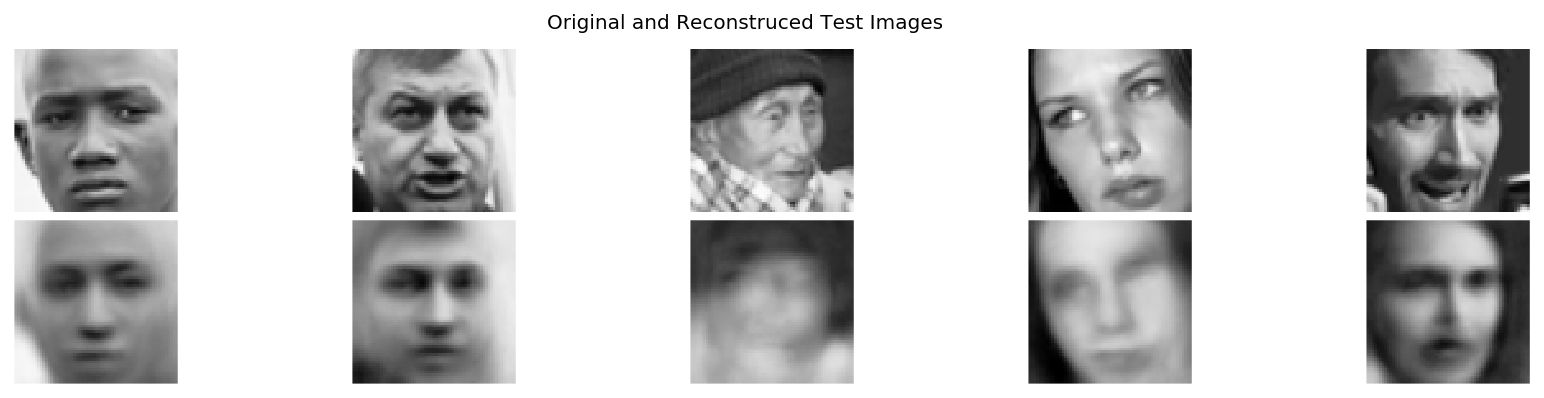

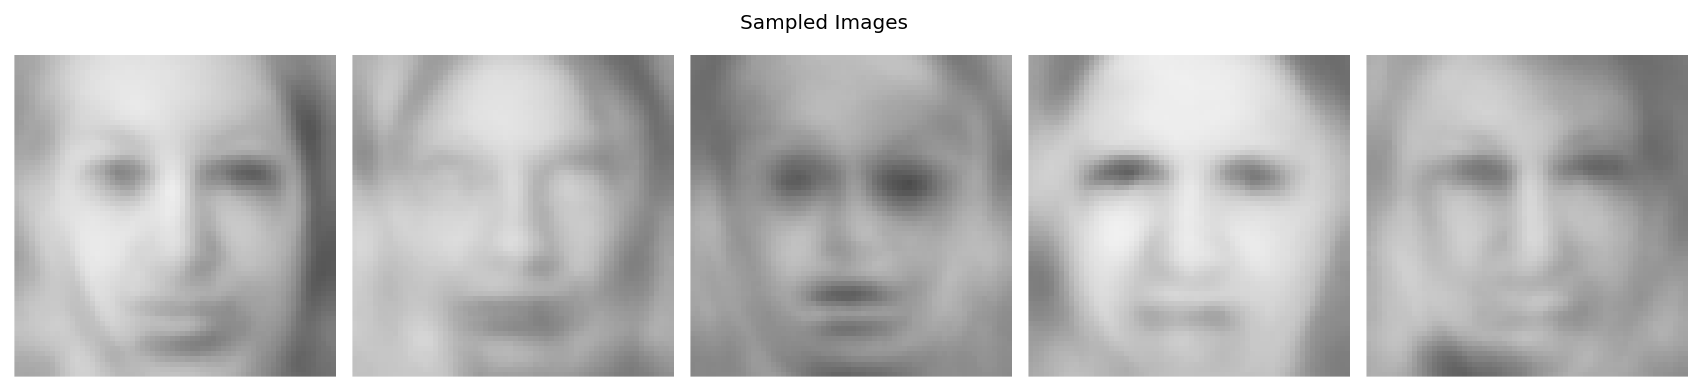

[3e+05/1e+06 32.0%][kl_weight:1.00] [LOSS] TOTAL[336.1]=RECON[196.7]+KL[139.4]
[3e+05/1e+06 34.0%][kl_weight:1.00] [LOSS] TOTAL[336.1]=RECON[196.7]+KL[139.4]
[4e+05/1e+06 36.0%][kl_weight:1.00] [LOSS] TOTAL[334.0]=RECON[194.7]+KL[139.4]
[4e+05/1e+06 38.0%][kl_weight:1.00] [LOSS] TOTAL[327.4]=RECON[188.0]+KL[139.4]
[4e+05/1e+06 40.0%][kl_weight:1.00] [LOSS] TOTAL[337.4]=RECON[198.0]+KL[139.4]


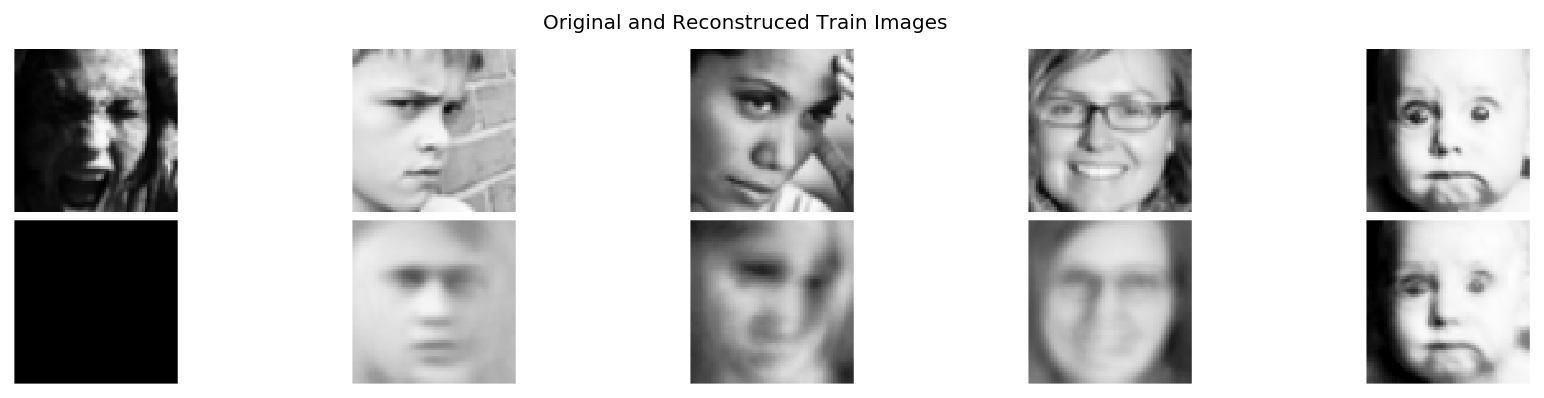

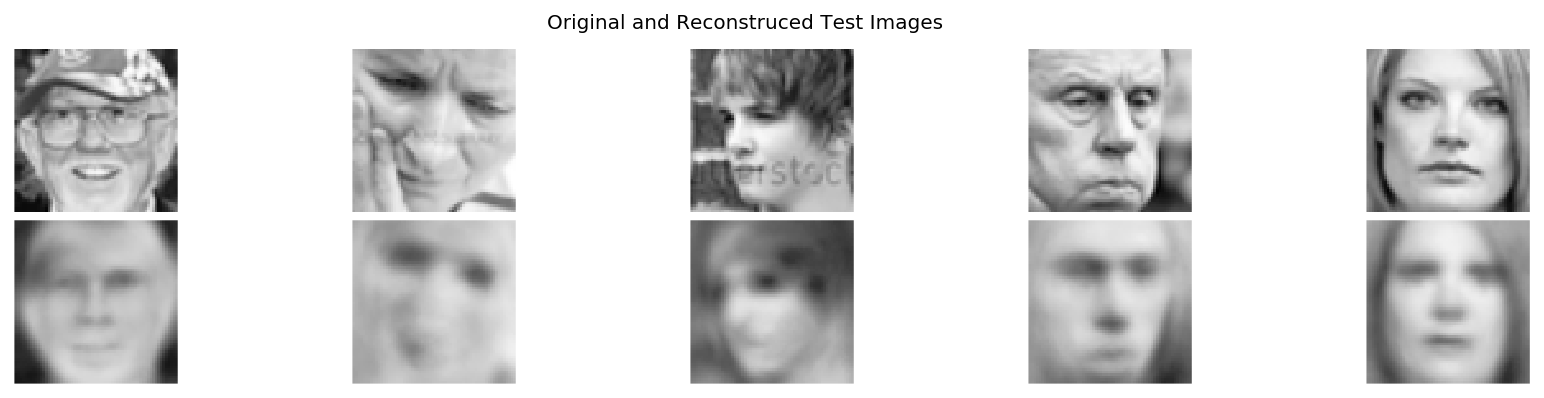

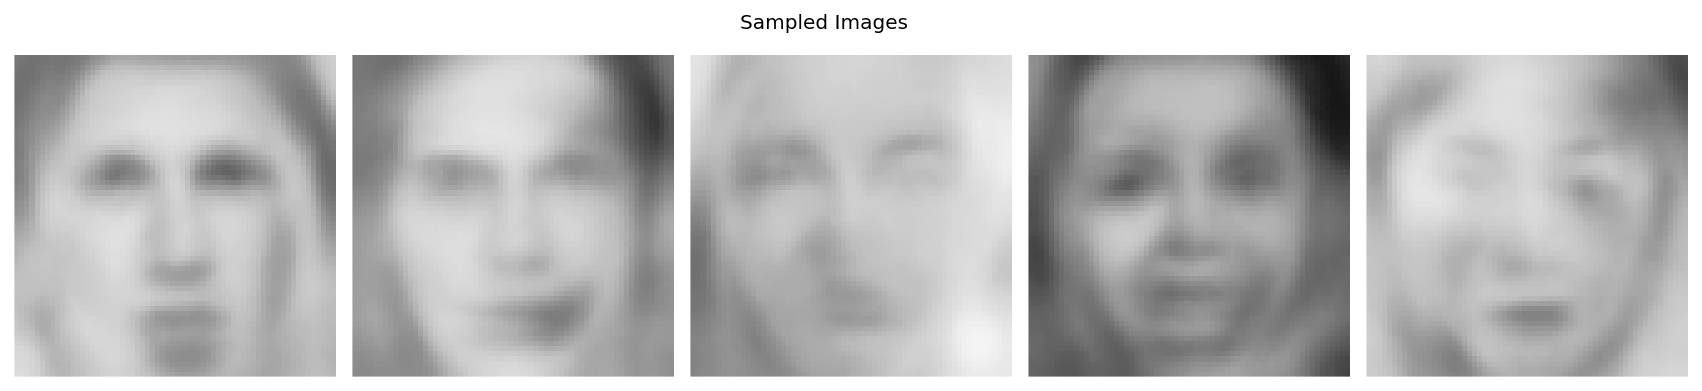

[4e+05/1e+06 42.0%][kl_weight:1.00] [LOSS] TOTAL[329.7]=RECON[190.2]+KL[139.5]
[4e+05/1e+06 44.0%][kl_weight:1.00] [LOSS] TOTAL[340.9]=RECON[201.4]+KL[139.4]
[5e+05/1e+06 46.0%][kl_weight:1.00] [LOSS] TOTAL[336.9]=RECON[197.5]+KL[139.4]
[5e+05/1e+06 48.0%][kl_weight:1.00] [LOSS] TOTAL[333.5]=RECON[194.1]+KL[139.4]
[5e+05/1e+06 50.0%][kl_weight:1.00] [LOSS] TOTAL[335.2]=RECON[195.8]+KL[139.4]


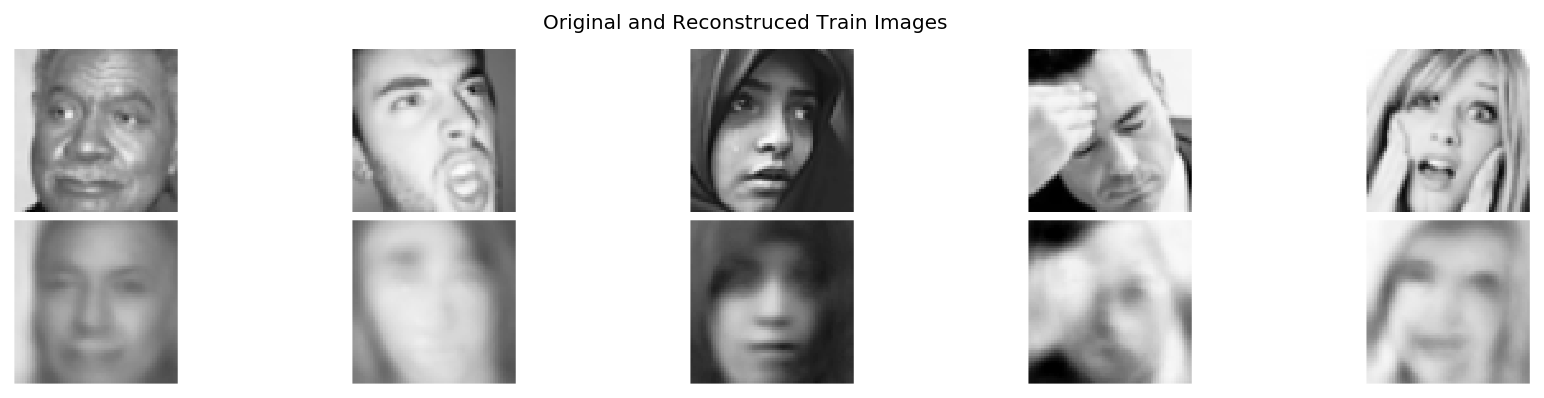

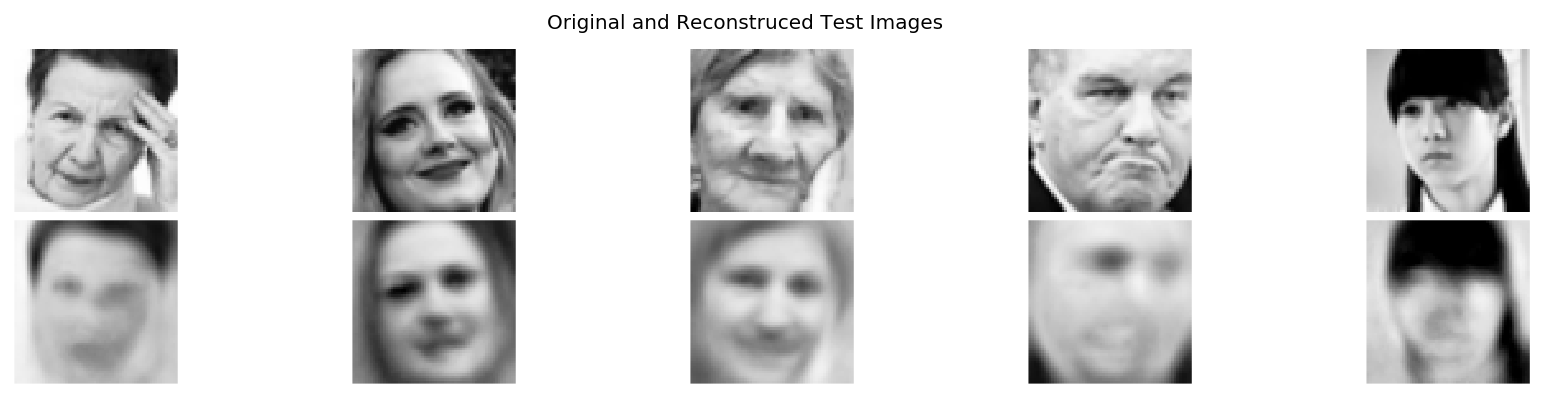

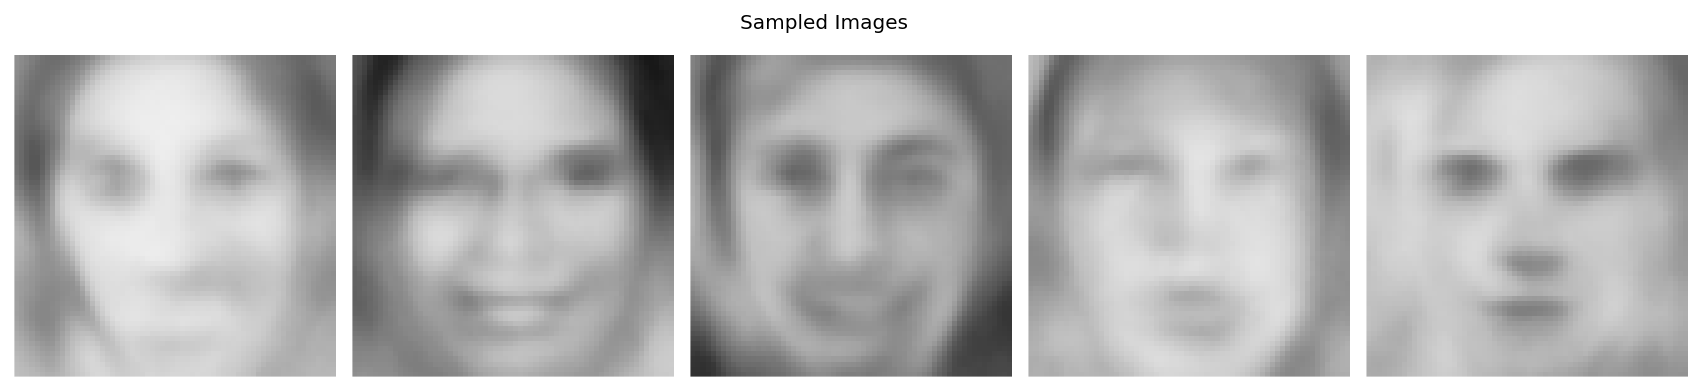

[5e+05/1e+06 52.0%][kl_weight:1.00] [LOSS] TOTAL[334.6]=RECON[195.1]+KL[139.5]
[5e+05/1e+06 54.0%][kl_weight:1.00] [LOSS] TOTAL[331.2]=RECON[191.8]+KL[139.5]
[6e+05/1e+06 56.0%][kl_weight:1.00] [LOSS] TOTAL[341.8]=RECON[202.3]+KL[139.5]
[6e+05/1e+06 58.0%][kl_weight:1.00] [LOSS] TOTAL[335.3]=RECON[195.8]+KL[139.5]
[6e+05/1e+06 60.0%][kl_weight:1.00] [LOSS] TOTAL[330.4]=RECON[190.9]+KL[139.5]


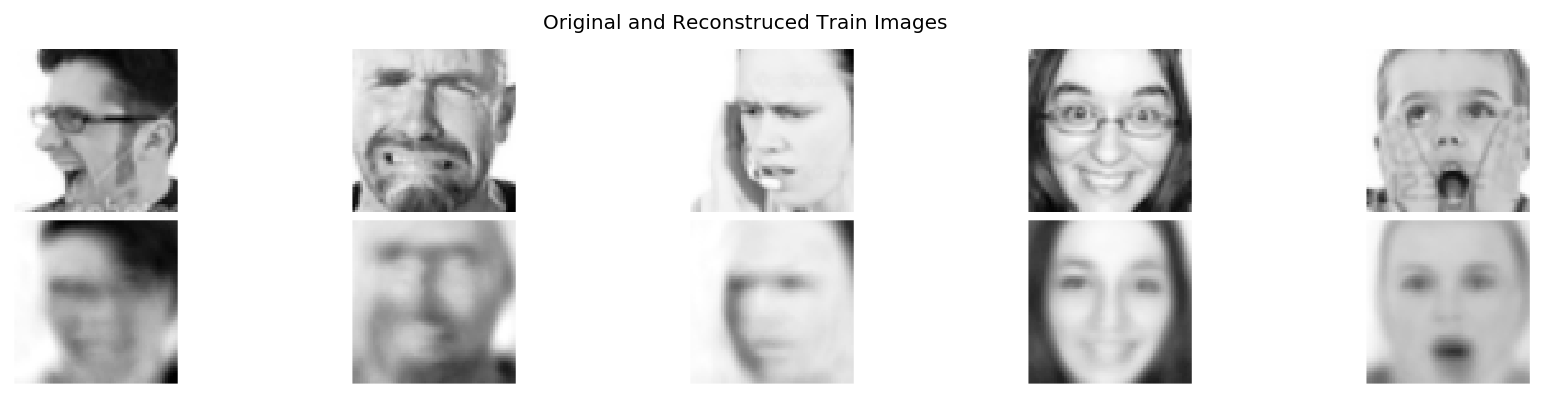

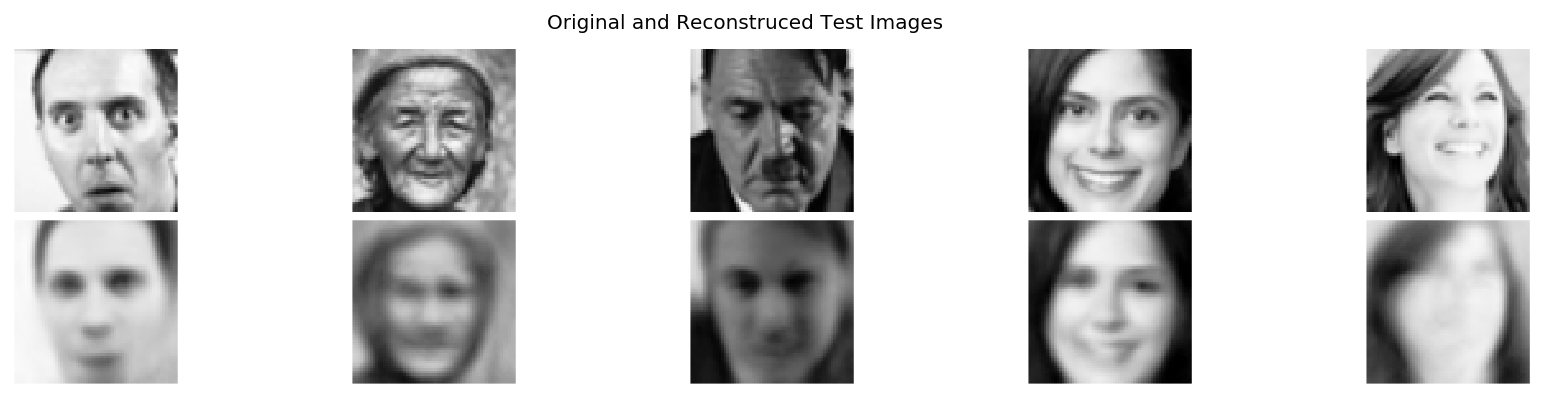

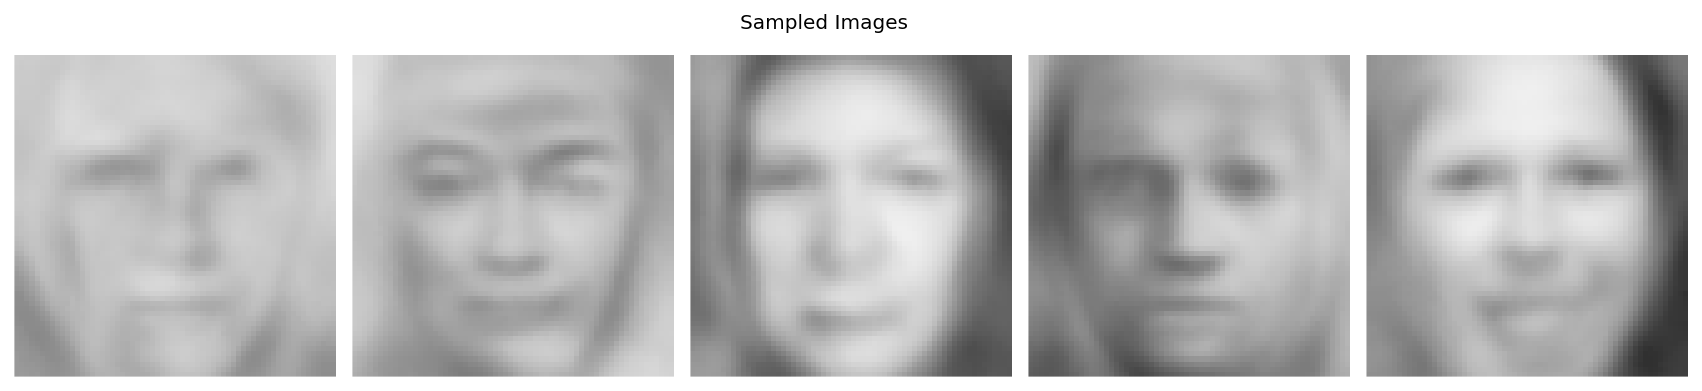

[6e+05/1e+06 62.0%][kl_weight:1.00] [LOSS] TOTAL[337.3]=RECON[197.7]+KL[139.5]
[6e+05/1e+06 64.0%][kl_weight:1.00] [LOSS] TOTAL[335.4]=RECON[195.9]+KL[139.5]
[7e+05/1e+06 66.0%][kl_weight:1.00] [LOSS] TOTAL[332.9]=RECON[193.4]+KL[139.5]
[7e+05/1e+06 68.0%][kl_weight:1.00] [LOSS] TOTAL[330.0]=RECON[190.5]+KL[139.5]
[7e+05/1e+06 70.0%][kl_weight:1.00] [LOSS] TOTAL[332.1]=RECON[192.5]+KL[139.6]


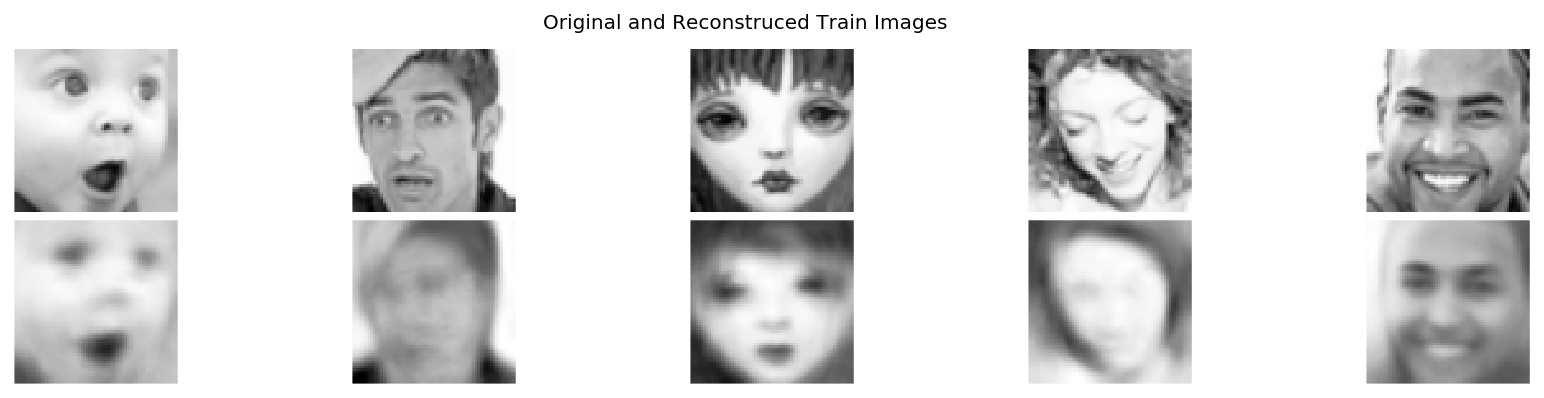

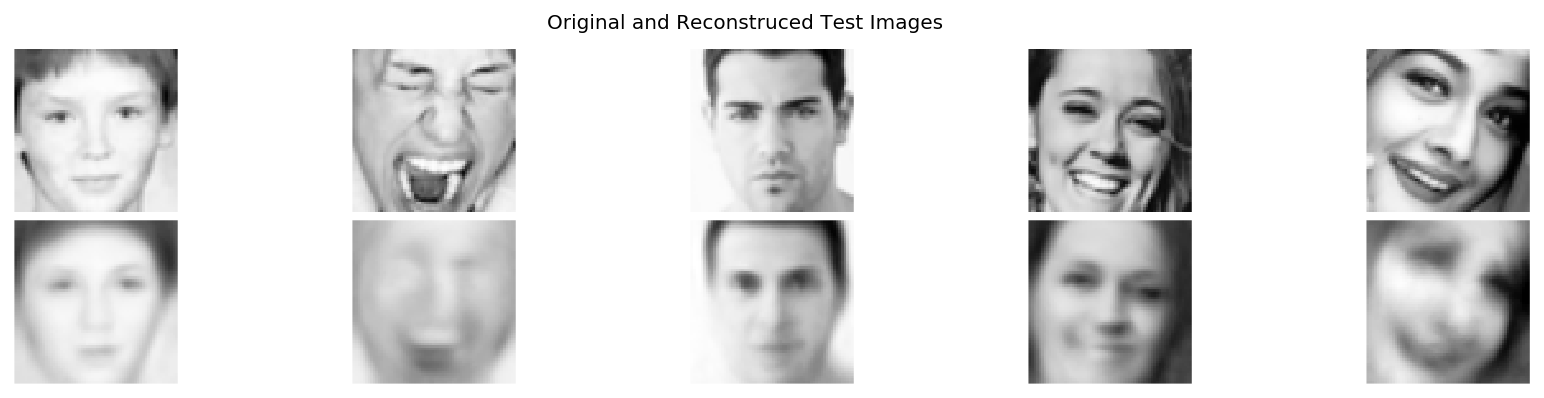

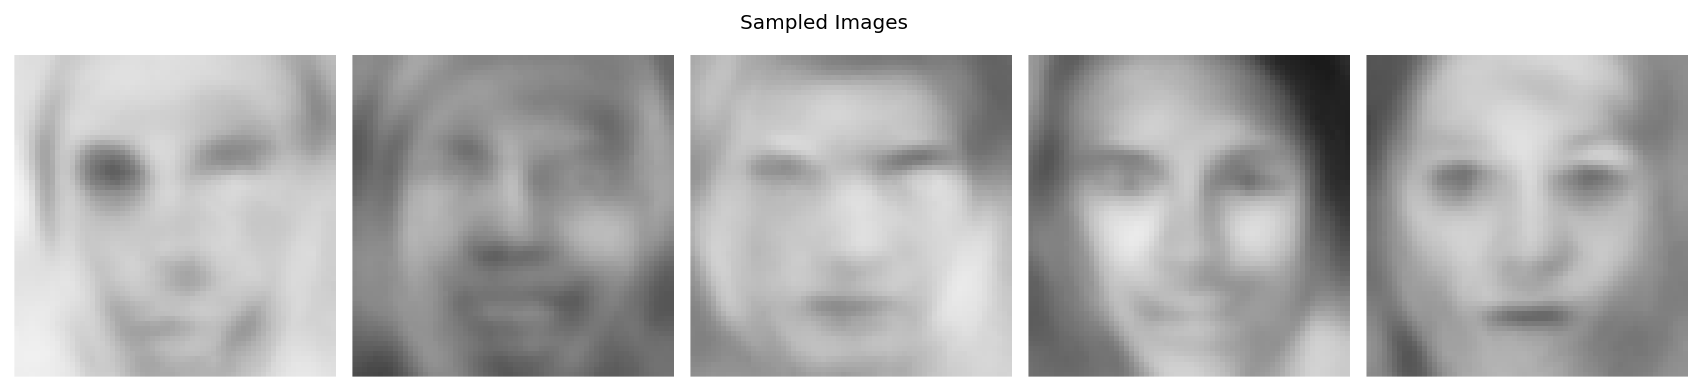

[7e+05/1e+06 72.0%][kl_weight:1.00] [LOSS] TOTAL[333.3]=RECON[193.8]+KL[139.5]
[7e+05/1e+06 74.0%][kl_weight:1.00] [LOSS] TOTAL[333.6]=RECON[194.0]+KL[139.6]
[8e+05/1e+06 76.0%][kl_weight:1.00] [LOSS] TOTAL[336.6]=RECON[197.1]+KL[139.5]
[8e+05/1e+06 78.0%][kl_weight:1.00] [LOSS] TOTAL[331.3]=RECON[191.7]+KL[139.6]
[8e+05/1e+06 80.0%][kl_weight:1.00] [LOSS] TOTAL[327.5]=RECON[187.9]+KL[139.6]


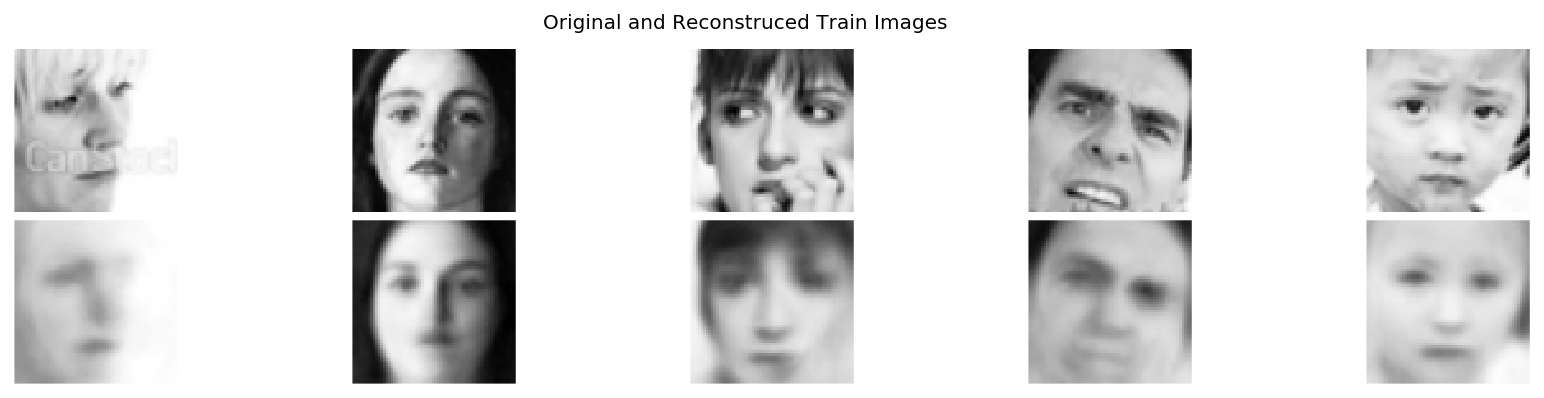

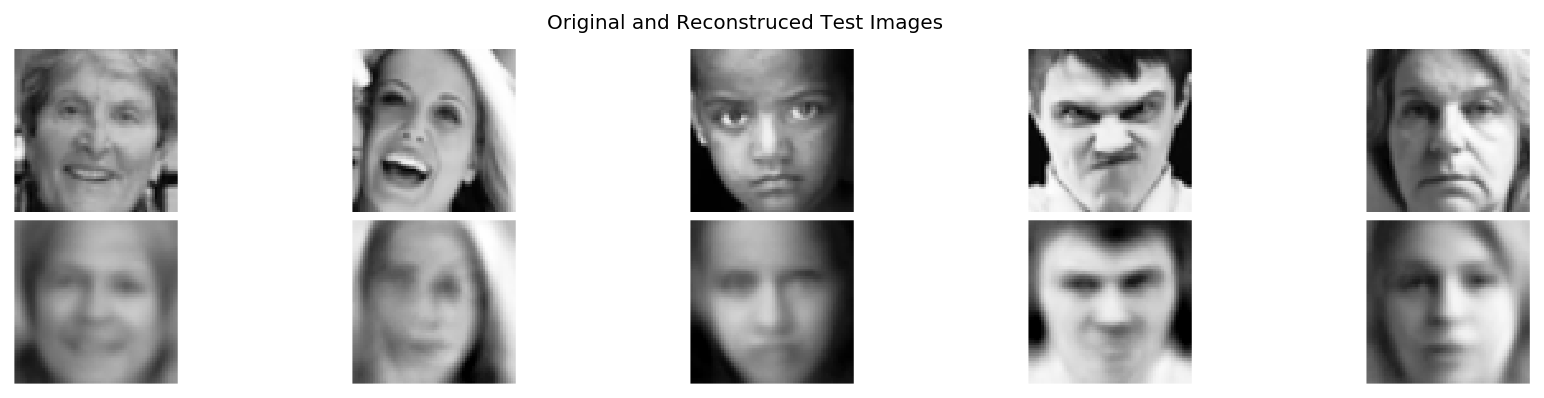

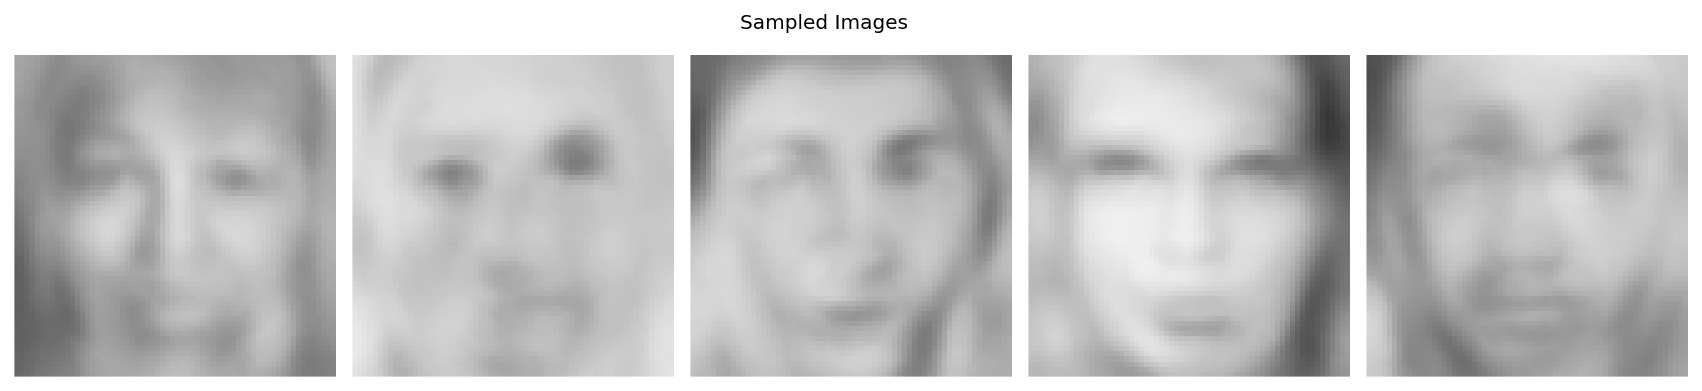

[8e+05/1e+06 82.0%][kl_weight:1.00] [LOSS] TOTAL[331.2]=RECON[191.6]+KL[139.6]
[8e+05/1e+06 84.0%][kl_weight:1.00] [LOSS] TOTAL[324.9]=RECON[185.3]+KL[139.6]
[9e+05/1e+06 86.0%][kl_weight:1.00] [LOSS] TOTAL[332.3]=RECON[192.7]+KL[139.6]
[9e+05/1e+06 88.0%][kl_weight:1.00] [LOSS] TOTAL[332.6]=RECON[193.0]+KL[139.6]
[9e+05/1e+06 90.0%][kl_weight:1.00] [LOSS] TOTAL[332.7]=RECON[193.0]+KL[139.6]


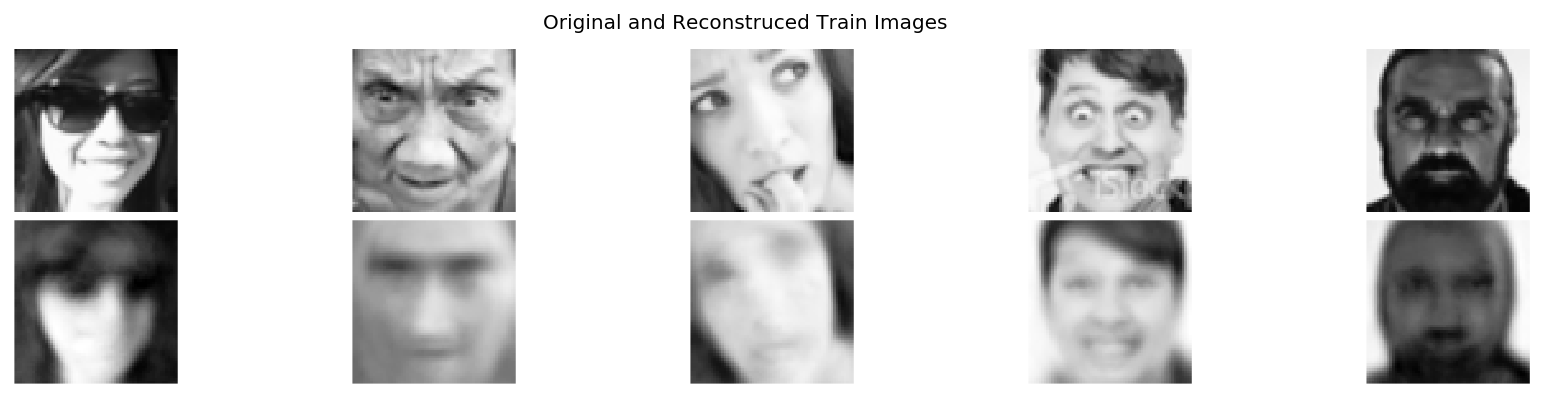

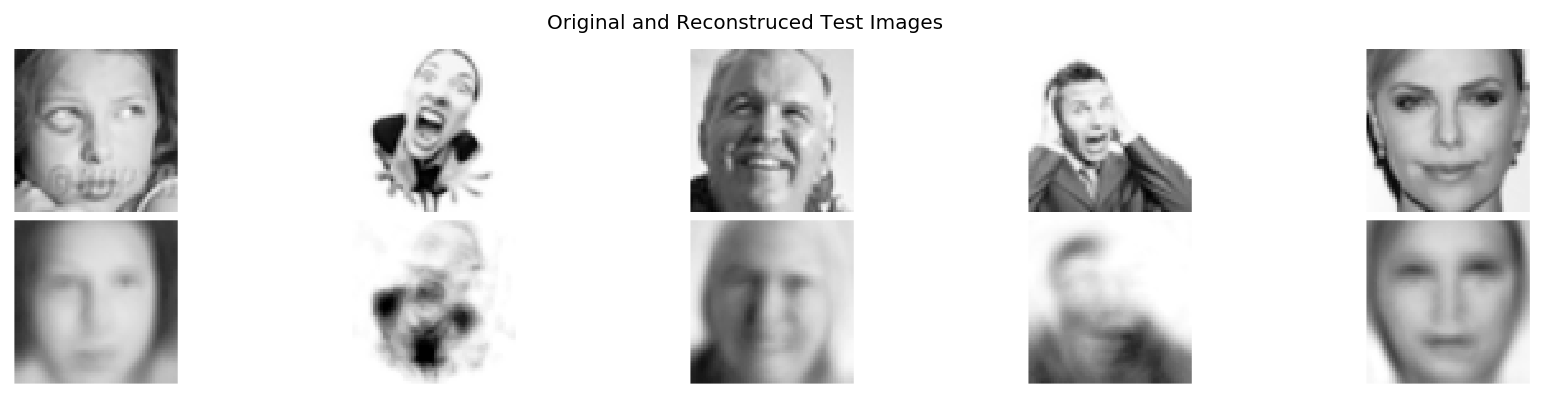

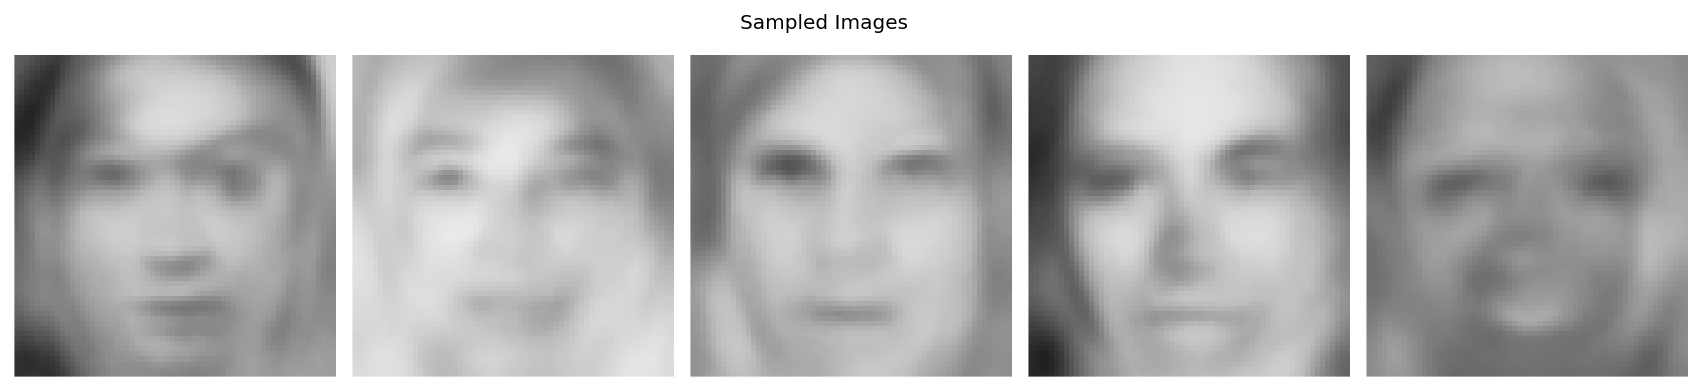

[9e+05/1e+06 92.0%][kl_weight:1.00] [LOSS] TOTAL[329.9]=RECON[190.2]+KL[139.7]
[9e+05/1e+06 94.0%][kl_weight:1.00] [LOSS] TOTAL[336.0]=RECON[196.3]+KL[139.7]
[1e+06/1e+06 96.0%][kl_weight:1.00] [LOSS] TOTAL[342.5]=RECON[202.8]+KL[139.7]
[1e+06/1e+06 98.0%][kl_weight:1.00] [LOSS] TOTAL[329.9]=RECON[190.2]+KL[139.7]
Done


In [4]:
sess = gpusession()
sess.run(tf.global_variables_initializer())
MAXITER,BATCHSIZE = (int)(1e6),128
PRINTEVERY,PLOTEVERY = (int)(MAXITER/50),(int)(MAXITER/10)
for ITER in range(MAXITER):
    RATE      = (float)(ITER)/(float)(MAXITER)
    offset    = (ITER*BATCHSIZE)%(ntrain) 
    batch_x   = trainimg[offset:(offset+BATCHSIZE),:]
    kl_weight = 1.0
    feeds = {V.x:batch_x,V.is_training:True,V.kl_weight:kl_weight}
    tfops = [V.solver,V.total_loss,V.recon_loss,V.kl_loss]
    _,total_loss,recon_loss,kl_loss=sess.run(tfops,feed_dict=feeds)
    if ITER % PRINTEVERY == 0:
        print ("[%.0e/%.0e %.1f%%][kl_weight:%.2f] [LOSS] TOTAL[%.1f]=RECON[%.1f]+KL[%.1f]"%
               (ITER,MAXITER,RATE*100.,kl_weight,total_loss,recon_loss,kl_loss))
    if ITER % PLOTEVERY == 0:
        """ Plot reconstructed train images """
        xref    = trainimg[np.random.permutation(ntrain)[:5],:]
        xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
        xconcat = np.concatenate((xref,xrecon),axis=0)
        plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
                       _figsize=(15,3),_title='Original and Reconstruced Train Images')
        """ Plot reconstructed test images """
        xref    = testimg[np.random.permutation(ntest)[:5],:]
        xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
        xconcat = np.concatenate((xref,xrecon),axis=0)
        plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
                       _figsize=(15,3),_title='Original and Reconstruced Test Images')
        """ Plot sampled images """
        samples = sess.run(V.xrecon_sample, 
                           feed_dict={V.z:np.random.randn(5,V.zdim),V.is_training:False})
        plot_grid_imgs(samples,_nr=1,_nc=5,_imgshp=xshp,_figsize=(15,3),
                       _title='Sampled Images')
print ("Done")

Save

In [5]:
V.save(_sess=sess,_savename='net/net_vae.npz')

[net/net_vae.npz] Saved. Size is [20.5]MB


Initialize 

Network initialized


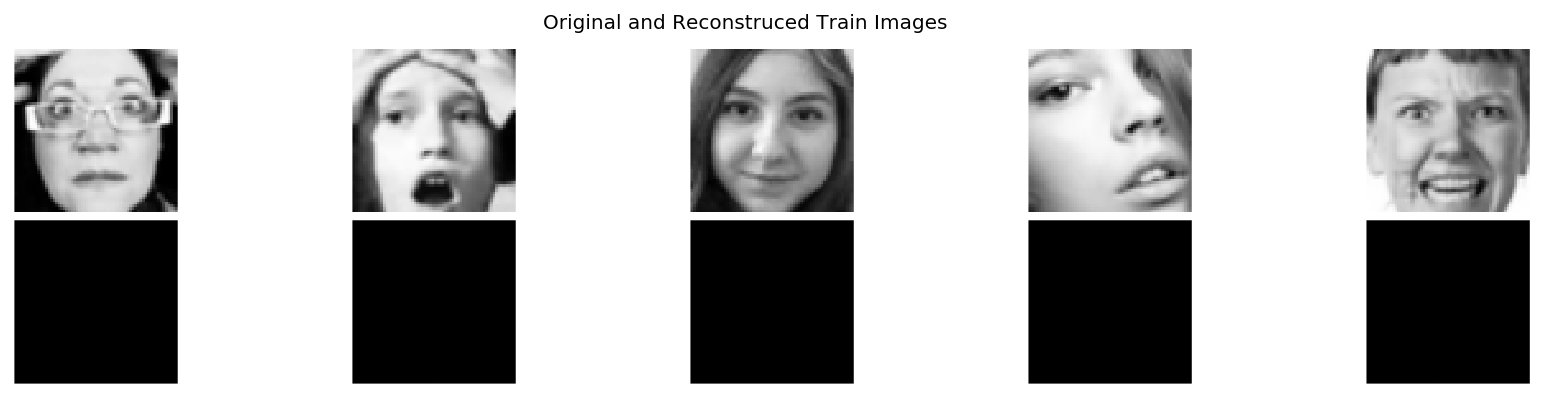

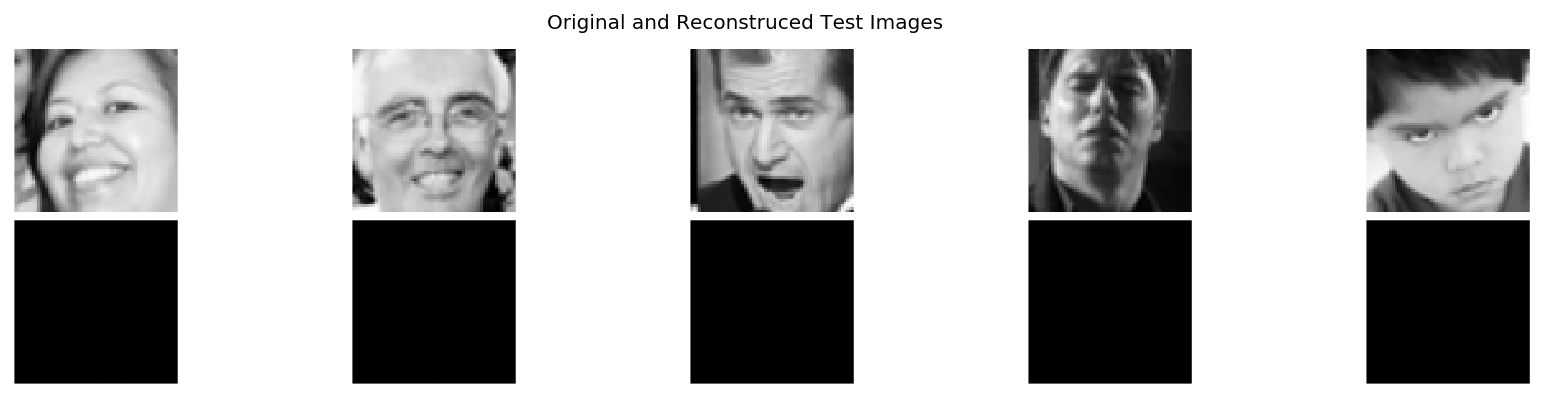

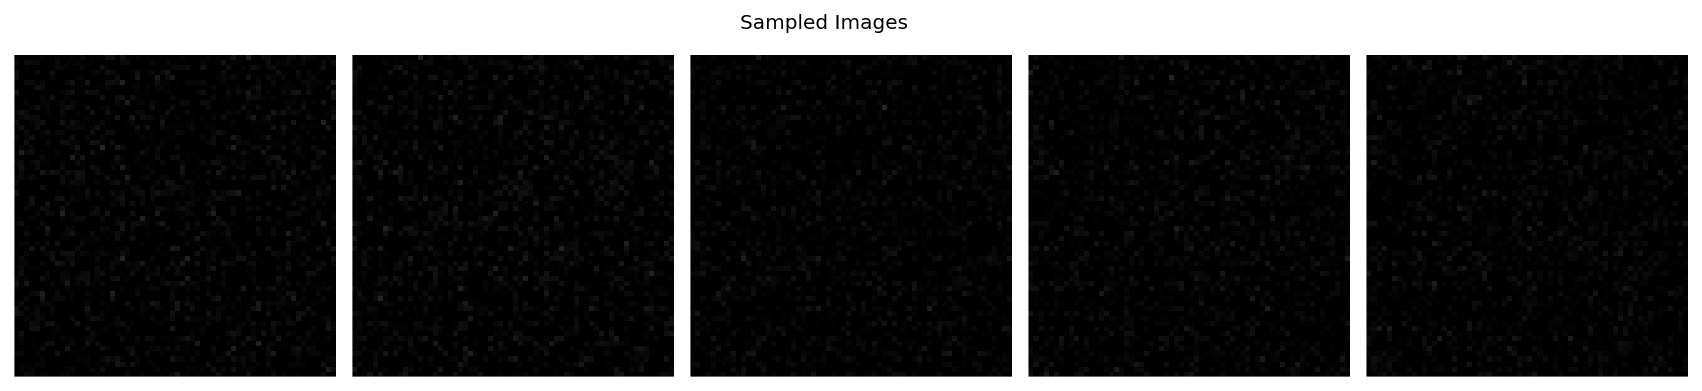

In [6]:
sess.run(tf.global_variables_initializer())
print ("Network initialized")

""" Plot reconstructed train images """
xref    = trainimg[np.random.permutation(ntrain)[:5],:]
xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
xconcat = np.concatenate((xref,xrecon),axis=0)
plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
               _figsize=(15,3),_title='Original and Reconstruced Train Images')
""" Plot reconstructed test images """
xref    = testimg[np.random.permutation(ntest)[:5],:]
xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
xconcat = np.concatenate((xref,xrecon),axis=0)
plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
               _figsize=(15,3),_title='Original and Reconstruced Test Images')
""" Plot sampled images """
samples = sess.run(V.xrecon_sample, 
                   feed_dict={V.z:np.random.randn(5,V.zdim),V.is_training:False})
plot_grid_imgs(samples,_nr=1,_nc=5,_imgshp=xshp,_figsize=(15,3),
               _title='Sampled Images')

Restore

Weight restored from [net/net_vae.npz]
Network restored


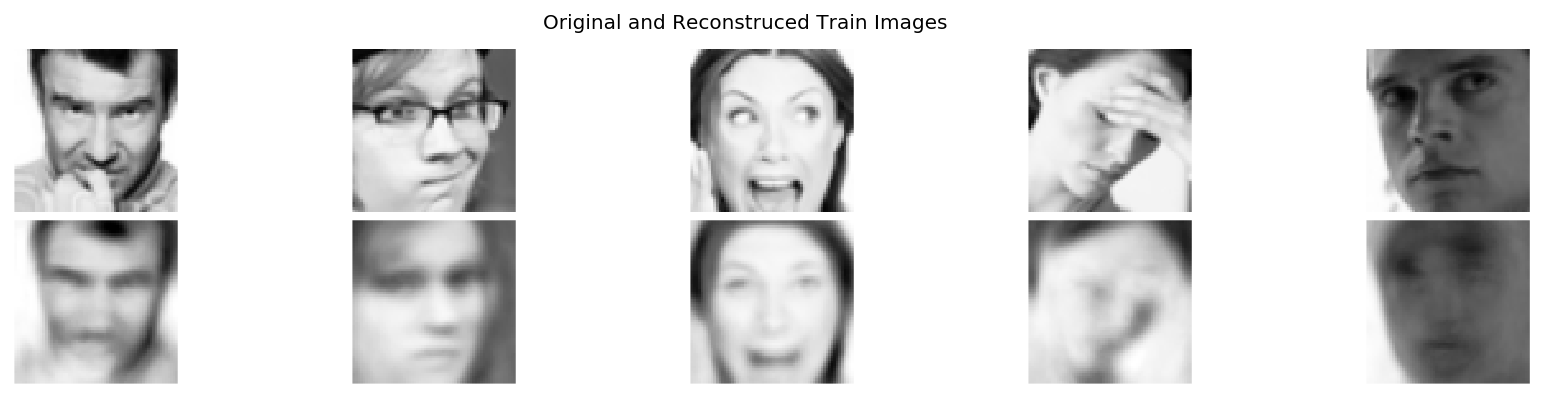

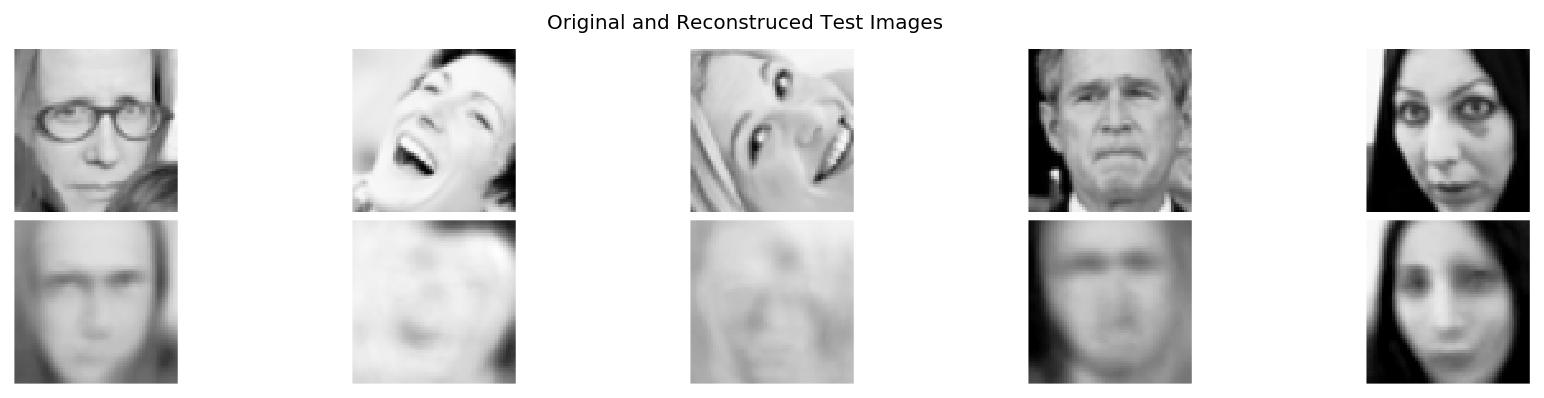

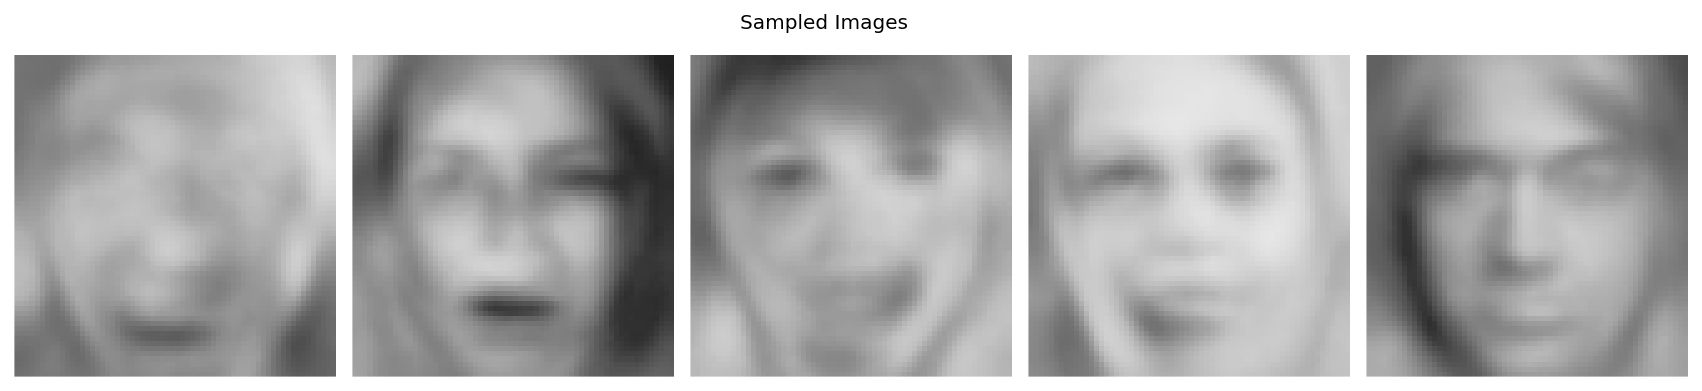

In [7]:
V.restore(_sess=sess,_loadname='net/net_vae.npz')
print ("Network restored")

""" Plot reconstructed train images """
xref    = trainimg[np.random.permutation(ntrain)[:5],:]
xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
xconcat = np.concatenate((xref,xrecon),axis=0)
plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
               _figsize=(15,3),_title='Original and Reconstruced Train Images')
""" Plot reconstructed test images """
xref    = testimg[np.random.permutation(ntest)[:5],:]
xrecon  = sess.run(V.xrecon_test,feed_dict={V.x:xref,V.is_training:False})
xconcat = np.concatenate((xref,xrecon),axis=0)
plot_grid_imgs(xconcat,_nr=2,_nc=5,_imgshp=xshp,
               _figsize=(15,3),_title='Original and Reconstruced Test Images')
""" Plot sampled images """
samples = sess.run(V.xrecon_sample, 
                   feed_dict={V.z:np.random.randn(5,V.zdim),V.is_training:False})
plot_grid_imgs(samples,_nr=1,_nc=5,_imgshp=xshp,_figsize=(15,3),
               _title='Sampled Images')